# Load the dataset

In [7]:
import numpy as np
import idx2numpy

train_images_file = "./data/train-images.idx3-ubyte"
train_labels_file = "./data/train-labels.idx1-ubyte"
test_images_file = "./data/t10k-images.idx3-ubyte"
test_labels_file = "./data/t10k-labels.idx1-ubyte"

X_train_raw = idx2numpy.convert_from_file(train_images_file)
y_train_raw = idx2numpy.convert_from_file(train_labels_file)
X_test_raw = idx2numpy.convert_from_file(test_images_file)
y_test_raw = idx2numpy.convert_from_file(test_labels_file)

### Convert (60000, 28, 28) to (60000, 784)

In [8]:
import pandas as pd

X_train = X_train_raw.reshape((X_train_raw.shape[0], -1)).T
y_train = y_train_raw.reshape((y_train_raw.shape[0], -1))
X_test = X_test_raw.reshape((X_test_raw.shape[0], -1)).T
y_test = y_test_raw.reshape((y_test_raw.shape[0], -1))

X_train = X_train / 255.0
X_test = X_test / 255.0

# X_train.shape >>> (60000, 784)

X_train_df = pd.DataFrame(X_train)
y_train_df = pd.DataFrame(y_train)
X_test_df = pd.DataFrame(X_test)
y_test_df = pd.DataFrame(y_test)

In [10]:
def init_params():
    W1 = np.random.randn(10, 784) * np.sqrt(2 / 784)
    W2 = np.random.randn(10, 10) * np.sqrt(2 / 10)
    b1 = np.zeros((10, 1))
    b2 = np.zeros((10, 1))

    return W1, b1, W2, b2

def relu(x):
    return np.maximum(x, 0)

def deriv_relu(Z):
    return Z > 0

def softmax(Z):
    return np.exp(Z) / np.sum(np.exp(Z))

def stable_softmax(Z):
    Z_shifted = Z - np.max(Z, axis=0, keepdims=True)
    exp_Z = np.exp(Z_shifted)
    return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)

def forward_propagation(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = relu(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = stable_softmax(Z2)

    return Z1, A1, Z2, A2

def one_hot(Y):
    Y = Y.flatten()
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def back_propagation(Z1, A1, Z2, A2, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)

    dZ2 = A2 - one_hot_Y
    dW2 = (1 / m) * dZ2.dot(A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = W2.T.dot(dZ2) * deriv_relu(Z1)
    dW1 = (1 / m) * dZ1.dot(X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - (alpha * dW1)
    b1 = b1 - (alpha * db1)
    W2 = W2 - (alpha * dW2)
    b2 = b2 - (alpha * db2)

    return W1, b1, W2, b2

In [11]:
iteration_list = []
accuracy_list = []

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    Y = Y.flatten()
    return np.mean(predictions == Y)

def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()

    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_propagation(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

        if i % 100 == 0:
            train_accuracy = get_accuracy(get_predictions(A2), Y)

            accuracy_list.append(train_accuracy)
            iteration_list.append(i)

            print("Iteration:", i)
            print("Accuracy:", train_accuracy)

            print("--------------------")

    return W1, b1, W2, b2

In [12]:
W1, b1, W2, b2  = gradient_descent(X_train, y_train, 4000, 0.01)

Iteration: 0
Accuracy: 0.14943333333333333
--------------------
Iteration: 100
Accuracy: 0.46148333333333336
--------------------
Iteration: 200
Accuracy: 0.5871166666666666
--------------------
Iteration: 300
Accuracy: 0.65105
--------------------
Iteration: 400
Accuracy: 0.7289
--------------------
Iteration: 500
Accuracy: 0.7630833333333333
--------------------
Iteration: 600
Accuracy: 0.78405
--------------------
Iteration: 700
Accuracy: 0.7991166666666667
--------------------
Iteration: 800
Accuracy: 0.8108833333333333
--------------------
Iteration: 900
Accuracy: 0.82095
--------------------
Iteration: 1000
Accuracy: 0.8295833333333333
--------------------
Iteration: 1100
Accuracy: 0.8369166666666666
--------------------
Iteration: 1200
Accuracy: 0.8426
--------------------
Iteration: 1300
Accuracy: 0.8480666666666666
--------------------
Iteration: 1400
Accuracy: 0.8527833333333333
--------------------
Iteration: 1500
Accuracy: 0.8566
--------------------
Iteration: 1600
Accurac

In [18]:
def test_model(W1, b1, W2, b2, X_test, Y_test):
    _, _, _, A2 = forward_propagation(W1, b1, W2, b2, X_test)
    predictions = get_predictions(A2)
    accuracy = get_accuracy(predictions, Y_test)
    return accuracy

In [20]:
test_accuracy = test_model(W1, b1, W2, b2, X_test, y_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.901


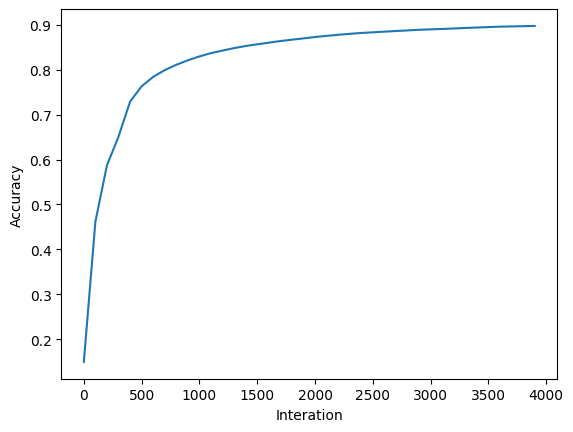

In [23]:
import matplotlib.pyplot as plt

def plot_accuracy(iteration_list, accuracy_list):
    plt.plot(iteration_list, accuracy_list)
    plt.xlabel("Interation")
    plt.ylabel("Accuracy")
    plt.show()

plot_accuracy(iteration_list, accuracy_list)

In [21]:
def plot_image(X_test, Y_test, index):
    image = X_test[:, index].reshape((28, 28))
    label = Y_test[index]

    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

def inference(W1, b1, W2, b2, X_test, Y_test, index):
    X = X_test[:, index].reshape(-1, 1)
    y = Y_test[index]

    _, _, _, A2 = forward_propagation(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)

    print("Prediction:", predictions)
    print("Label:", y)
    return None

In [ ]:
rand_col_index = np.random.randint(X_test.shape[1])
inference(W1, b1, W2, b2, X_test, y_test, rand_col_index)
plot_image(X_test, y_test, rand_col_index)